<h1>Applied Data Science Capstone Week 4 Peer-Graded Assignment</h1>

<h2>The Battle of Neighborhoods</h2>

<h2>Introduction to the problem</h2>

<p>New Brunswick's capital city is rich in culture, history and riverside beauty. Stand in awe at the newly expanded Beaverbrook Art Gallery; discover Fredericton's past in the Historic Garrison District; tap your toes at the award-winning Harvest Jazz & Blues Festival; walk or bike over 115 km of riverside trails; explore the Saint John River by kayak or canoe. Craft beer enthusiast? Fredericton boasts the highest concentration of craft breweries and tasting experiences in the Maritimes.
</p>

<p>We have an interest in answering the following questions regarding the city of Fredericton:</p>

- What neighbourhoods have the highest crime?
- Is population density correlated to crime level?
- Using Foursquare data, what venues are most common in different locations within the city?
- Does the Knowledge Park really need a coffee shop?

<p>Does the Open Data project have specific enough or thick enough data to empower decisions to be made or is it too aggregate to provide value in its current detail? Let's find out.
</p>

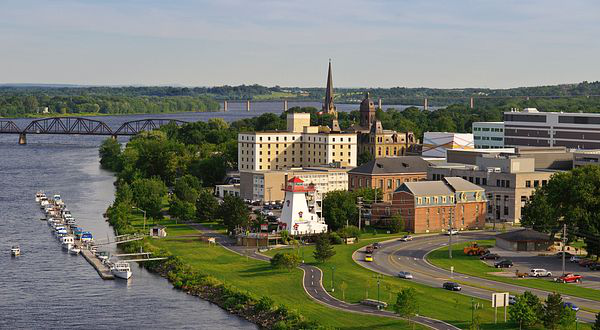

In [5]:
import requests
from PIL import Image
url = 'https://www.tourismnewbrunswick.ca/-/media/Images/Website/Products/R/RegentStreetWharf/City_of_Fredericton2013.ashx'
im = Image.open(requests.get(url, stream=True).raw)
im

<h2>Data</h2>

<b>To understand and explore we will need the following City of Fredericton Open Data:¶
</b>

- Open Data Site: <a href = 'http://data-fredericton.opendata.arcgis.com/</a>'>http://data-fredericton.opendata.arcgis.com/</a>
- Fredericton Neighbourhoods: <a href = 'http://data-fredericton.opendata.arcgis.com/datasets/neighbourhoods--quartiers'>http://data-fredericton.opendata.arcgis.com/datasets/neighbourhoods--quartiers</a>
- Fredericton Crime by Neighbourhood: <a href = 'http://data-fredericton.opendata.arcgis.com/datasets/crime-by-neighbourhood-2017--crime-par-quartier-2017'>http://data-fredericton.opendata.arcgis.com/datasets/crime-by-neighbourhood-2017--crime-par-quartier-2017</a>
Fredericton Census Tract Demographics: <a href = 'http://data-fredericton.opendata.arcgis.com/datasets/census-tract-demographics--donn%C3%A9es-d%C3%A9mographiques-du-secteur-de-recensement'>http://data-fredericton.opendata.arcgis.com/datasets/census-tract-demographics--donn%C3%A9es-d%C3%A9mographiques-du-secteur-de-recensement</a>
Fredericton locations of interest: <a href = 'https://github.com/JasonLUrquhart/Applied-Data-Science-Capstone/blob/master/Fredericton%20Locations.xlsx'>https://github.com/JasonLUrquhart/Applied-Data-Science-Capstone/blob/master/Fredericton%20Locations.xlsx</a>

<p>Using this data will allow exploration and examination to answer the questions. The neighbourhood data will enable us to properly group crime by neighbourhood. The Census data will enable us to then compare the population density to examine if areas of highest crime are also most densely populated. Fredericton locations of interest will then allow us to cluster and quantitatively understand the venues most common to that location.</p>

<h2>Methodology</h2>

<p>All steps are referenced beleow in the Appendix: Analysis section.
</p>

<p>The methodology will include:
</p>

<p>
  
- Examine the crime frequency by neighbourhood
    
- Study the crime types and then pivot analysis of crime type frequency by neighbourhood
    
- nderstand correlation between crimes and population density
    
- Perform k-means statisical analysis on venues by locations of interest based on findings from crimes and neighbourhood
    
- Determine which venues are most common statistically in the region of greatest crime count then in all other locations of interest.
    
- Determine if an area, such as the Knowledge Park needs a coffee shop.</p>

<h3>Loading the data
</h3>

<p>
After loading the applicable libraries, the referenced geojson neighbourhood data was loaded from the City of Fredericton Open Data site. This dataset uses block polygon shape coordinates which are better for visualization and comparison. The City also uses Ward data but the Neighbourhood location data is more accurate and includes more details. The same type of dataset was then loaded for the population density from the Stats Canada Census tracts.

The third dataset, an excel file, "Crime by Neighbourhood 2017" downloaded from the City of Fredericton Open Data site is found under the Public Safety domain. This dataset was then uploaded for the analysis. It's interesting to note the details of this dataset are aggregated by neighbourhood. It is not an exhaustive set by not including all crimes (violent offenses) nor specific location data of the crime but is referenced by neighbourhood.

This means we can gain an understanding of the crime volume by type by area but not specific enough to understand the distribution properties. Valuable questions such as, "are these crimes occuring more often in a specific area and at a certain time by a specific demographic of people?" cannot be answered nor explored due to what is reasonably assumed to be personal and private information with associated legal risks.

There is value to the city to explore the detailed crime data using data science to predict frequency, location, timing and conditions to best allocated resources for the benefit of its citizens and it's police force. However, human behaviour is complex requiring thick profile data by individual and the conditions surrounding the event(s). To be sufficient for reliable future prediction it would need to demonstrate validity, currency, reliability and sufficiency.
</p>

<h3>Exploring the data</h3>

<p>Exploring the count of crimes by neighbourhood gives us the first glimpse into the distribution.

One note is the possibility neighbourhoods names could change at different times. The crime dataset did not mention which specific neighbourhood naming dataset it was using but we assumed the neighbourhood data provided aligned with the neighbourhoods used in the crime data. It may be beneficial for the City to note and timestamp neighbourhood naming in the future or simply reference with neighbourhood naming file it used for the crime dataset.

An example of data errors: There was an error found in the naming of the neighbourhood "Platt". The neighbourhood data stated "Plat" while the crime data stated "Platt". Given the crime dataset was most simple to manipulate it was modified to "Plat". The true name of the neighbourhood is "Platt".</p>

<h3>First Visualization of Crime</h3>

<p>Once the data was prepared, a choropleth map was created to view the crime count by neighbourhood. As expected the region of greatest crime count was found in the downtown and Platt neighbourhoods.

Examining the crime types enables us to learn the most frequent occuring crimes which we then plot as a bar chart to see most frequenty type.

Theft from motor vehicles is most prevalent in the same area as the most frequent crimes. It's interesting to note this area is mostly residential and most do not have garages. It would be interesting to further examine if surveillance is a deterant for motor vehicle crimes in the downtown core compared to low surveillance in the Platt neighbourhood.</p>

<h3>Examining 2nd most common crime given it is specific: theft from vehicles</h3>

<p>After exploring the pivot table showing Crime_Type by Neighbourhood, we drill into a specific type of crime, theft from vehicles and plot the choropleth map to see which area has the greatest frequency.

Again, the Platt neighbourhood appears as the most frequent.

Is this due to population density?</p>

<h3>Introducing the Census data to explore the correlation between crime frequency and population density.</h3>

<p>Visualising the population density enables us to determine that the Platt neighbourhood has lower correlation to crime frequency than I would have expected.

It would be interesting to further study the Census data and if this captures the population that is renting or more temporary/transient poplution, given the City is a University hub.</p>

<h3>Look at specific locations to understand the connection to venues using Foursquare data</h3>

<p>Loading the "Fredericton Locations" data enables us to perform a statistical analysis on the most common venues by location.

We might wonder if the prevalence of bars and clubs in the downtown region has something to do with the higher crime rate in the near Platt region.

Plotting the latitude and longitude coordinates of the locations of interest onto the crime choropleth map enables us to now study the most common venues by using the Foursquare data.</p>

<h4>Analysing each Location</h4>

<p>Grouping rows by location and the mean of the frequency of occurance of each category we venue categories we study the top five most common venues.

Putting this data into a pandas dataframe we can then determine the most common venues by location and plot onto a map.</p>

<h2>Results</h2>

<p>The analysis enabled us to discover and describe visually and quantitatively:
</p>

<p>- Neighbourhoods in Fredericton

- Crime freqency by neighbourhood

- Crime type frequency and statistics. The mean crime count in the City of Fredericton is 22.

- Crime type count by neighbourhood.
Theft from motor vehicles is most prevalent in the same area as the most frequent crimes. It's interesting to note this area is mostly residential and most do not have garages. It would be interesting to further examine if surveillance is a deterant for motor vehicle crimes in the downtown core compared to low surveillance in the Platt neighbourhood.

- Motor Vehicle crimes less than $5000 analysis by neighbourhood and resulting statistics.
The most common crime is Other Theft less than 5k followed by Motor Vehicle Theft less than 5k. There is a mean of 6 motor vehicle thefts less than 5k by neighbourhood in the City.

- That population density and resulting visual correlation is not strongly correlated to crime frequency. Causation for crime is not able to be determined given lack of open data specificity by individual and environment.

- Using k-menas, we were able to determine the top 10 most common venues within a 1 km radius of the centroid of the highest crime neighbourhood. The most common venues in the highest crime neighbourhood are coffee shops followed by Pubs and Bars.</p>

While, it is not valid, consistent, reliable or sufficient to assume a higher concentration of the combination of coffee shops, bars and clubs predicts the amount of crime occurance in the City of Fredericton, this may be a part of the model needed to be able to in the future.

- We were able to determine the top 10 most common venues by location of interest.

- Statisically, we determined there are no coffee shops within the Knowledge Park clusters.

<h2>Discussion and Recommendations</h2>

The City of Fredericton Open Data enables us to gain an understanding of the crime volume by type by area but not specific enough to understand the distribution properties. Valuable questions such as, "are these crimes occuring more often in a specific area and at a certain time by a specific demographic of people?" cannot be answered nor explored due to what is reasonably assumed to be personal and private information with associated legal risks.

There is value to the city to explore the detailed crime data using data science to predict frequency, location, timing and conditions to best allocated resources for the benefit of its citizens and it's police force. However, human behaviour is complex requiring thick profile data by individual and the conditions surrounding the event(s). To be sufficient for reliable future prediction it would need to demonstrate validity, currency, reliability and sufficiency.

A note of caution is the possibility neighbourhoods names could change. The crime dataset did not mention which specific neighbourhood naming dataset it was using but we assumed the neighbourhood data provided aligned with the neighbourhoods used in the crime data. It may be beneficial for the City to note and timestamp neighbourhood naming in the future or simply reference with neighbourhood naming file it used for the crime dataset.

Errors exist in the current open data. An error was found in the naming of the neighbourhood "Platt". The neighbourhood data stated "Plat" while the crime data stated "Platt". Given the crime dataset was most simple to manipulate it was modified to "Plat". The true name of the neighbourhood is "Platt".

Theft from motor vehicles is most prevalent in the same area as the most frequent crimes. It is interesting to note this area is mostly residential and most do not have garages. It would be interesting to further examine if surveillance is a deterant for motor vehicle crimes in the downtown core compared to low surveillance in the Platt neighbourhood.

It would be interesting to further study the Census data and if this captures the population that is renting or more temporary/transient poplution, given the City is a University hub.

Given the findings of the top 10 most frequent venues by locations of interest, the Knowledge Park does not have Coffee Shops in the top 10 most common venues as determined from the Foursquare dataset. Given this area has the greatest concentration of stores and shops as venues, it would be safe to assume a coffee shop would be beneficial to the business community and the citizens of Fredericton.

<h2>Conclusion</h2>

<p>Using a combination of datasets from the City of Fredericton Open Data project and Foursquare venue data we were able to analyse, discover and describe neighbhourhoods, crime, population density and statistically describe quantitatively venues by locations of interest.

While overall, the City of Fredericton Open Data is interesting, it misses the details required for true valued quantitiatve analysis and predictive analytics which would be most valued by investors and developers to make appropriate investments and to minimize risk.

The Open Data project is a great start and empowers the need for a "Citizens Like Me" model to be developed where citizens of digital Fredericton are able to share their data as they wish for detailed analysis that enables the creation of valued services.</p>

<h2>APPENDIX: Analysis</h2>

<h3>Load Libraries</h3>

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# for webscraping import Beautiful Soup 
from bs4 import BeautifulSoup

import xml

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0



geopy-1.21.0         | 58 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: fa

In [3]:
r = requests.get('https://opendata.arcgis.com/datasets/823d86e17a6d47808c6e4f1c2dd97928_0.geojson')
fredericton_geo = r.json()

In [4]:
neighborhoods_data = fredericton_geo['features']

In [5]:
neighborhoods_data[0]

{'type': 'Feature',
 'properties': {'FID': 1,
  'OBJECTID': 1,
  'Neighbourh': 'Fredericton South',
  'Shape_Leng': 40412.2767429,
  'Shape_Area': 32431889.0002},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-66.6193489311946, 45.8688925859664],
    [-66.6746402369322, 45.9061285859908],
    [-66.7096026677901, 45.9293891917718],
    [-66.7122526978783, 45.9309262230525],
    [-66.7110938711618, 45.9342063302882],
    [-66.7087133356588, 45.9350435075345],
    [-66.7074107784969, 45.9356745059121],
    [-66.706611277894, 45.9362430230541],
    [-66.7056949963042, 45.937405028971],
    [-66.7051919397451, 45.9388543785676],
    [-66.7061441539463, 45.9390980155132],
    [-66.7046080348104, 45.9387919073835],
    [-66.7041049782513, 45.9393666396225],
    [-66.7022364824603, 45.9407722096716],
    [-66.6992271262585, 45.9446139193389],
    [-66.6996762839006, 45.9448512845371],
    [-66.6993978061625, 45.9450511702315],
    [-66.699766115429, 45.9452510552052],
    [-66.695624881

In [6]:
g = requests.get('https://opendata.arcgis.com/datasets/6179d35eacb144a5b5fdcc869f86dfb5_0.geojson')
demog_geo = g.json()

In [7]:
demog_data = demog_geo['features']
demog_data[0]

{'type': 'Feature',
 'properties': {'FID': 1,
  'OBJECTID': 501,
  'DBUID': '1310024304',
  'DAUID': '13100243',
  'CDUID': '1310',
  'CTUID': '3200002.00',
  'CTNAME': '0002.00',
  'DBuid_1': '1310024304',
  'DBpop2011': 60,
  'DBtdwell20': 25,
  'DBurdwell2': 22,
  'Shape_Leng': 0.00746165241824,
  'Shape_Area': 2.81310751889e-06,
  'CTIDLINK': 3200002,
  'Shape__Area': 50139.15234375,
  'Shape__Length': 929.421025287179},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-66.634784212921, 45.9519239912381],
    [-66.6351046935752, 45.9507605156138],
    [-66.6378263667982, 45.9510868696778],
    [-66.636944377136, 45.9521037018384],
    [-66.634784212921, 45.9519239912381]]]}}

In [16]:
import os

In [17]:
opencrime = 'Crime_by_neighbourhood_2017.xlsx'

In [18]:
workbook = pd.ExcelFile(opencrime)
print(workbook.sheet_names)

['Worksheet']


In [19]:
crime_df = workbook.parse('Worksheet')
crime_df.head()

,Neighbourhood,From_Date,To_Date,Crime_Code,Crime_Type,Ward,City,FID
0,Fredericton South,1.483574e+12,1.485389e+12,2120,B&E NON-RESIDNCE,7,Fredericton,1
1,Fredericton South,1.488586e+12,1.488758e+12,2120,B&E NON-RESIDNCE,7,Fredericton,2
2,Fredericton South,1.494115e+12,NaN,2120,B&E NON-RESIDNCE,12,Fredericton,3
3,Fredericton South,1.497917e+12,1.498003e+12,2120,B&E NON-RESIDNCE,12,Fredericton,4
4,Fredericton South,1.499558e+12,1.499645e+12,2120,B&E NON-RESIDNCE,7,Fredericton,5


In [20]:
crime_df.drop(['From_Date', 'To_Date'], axis=1,inplace=True)

<h2>What is the crime count by neighbourhood?</h2>

In [21]:
crime_data = crime_df.groupby(['Neighbourhood']).size().to_frame(name='Count').reset_index()
crime_data

,Neighbourhood,Count
0,Barkers Point,47
1,Brookside,54
2,Brookside Estates,9
3,Brookside Mini Home Park,5
4,College Hill,41
5,Colonial heights,9
6,Cotton Mill Creek,4
7,Diamond Street,1
8,Doak Road,1
9,Douglas,3


In [22]:
crime_data.describe()

,Count
count,66.000000
mean,22.121212
std,34.879359
min,1.000000
25%,3.000000
50%,9.000000
75%,23.250000
max,198.000000


In [23]:
crime_data.rename(index=str, columns={'Neighbourhood':'Neighbourh','Count':'Crime_Count'}, inplace=True)
crime_data

,Neighbourh,Crime_Count
0,Barkers Point,47
1,Brookside,54
2,Brookside Estates,9
3,Brookside Mini Home Park,5
4,College Hill,41
5,Colonial heights,9
6,Cotton Mill Creek,4
7,Diamond Street,1
8,Doak Road,1
9,Douglas,3


In [24]:
crime_data.rename({'Platt': 'Plat'},inplace=True)
crime_data.rename(index=str, columns={'Neighbourhood':'Neighbourh','Count':'Crime_Count'}, inplace=True)
crime_data

,Neighbourh,Crime_Count
0,Barkers Point,47
1,Brookside,54
2,Brookside Estates,9
3,Brookside Mini Home Park,5
4,College Hill,41
5,Colonial heights,9
6,Cotton Mill Creek,4
7,Diamond Street,1
8,Doak Road,1
9,Douglas,3


In [25]:
address = 'Fredericton, Canada'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Fredericton, New Brunswick is {}, {}.'.format(latitude, longitude))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Fredericton, New Brunswick is 45.966425, -66.645813.


In [26]:
world_geo = r'world_countries.json' # geojson file

fredericton_1_map = folium.Map(location=[45.97, -66.65], width=1000, height=750,zoom_start=12)

fredericton_1_map

In [27]:
fredericton_geo = r.json()

threshold_scale = np.linspace(crime_data['Crime_Count'].min(),crime_data['Crime_Count'].max(), 6,dtype=int)
threshold_scale = threshold_scale.tolist()
threshold_scale[-1] = threshold_scale[-1]+1

fredericton_1_map.choropleth(geo_data=fredericton_geo, data=crime_data,columns=['Neighbourh', 'Crime_Count'],
    key_on='feature.properties.Neighbourh', threshold_scale=threshold_scale,fill_color='YlOrRd', fill_opacity=0.7, 
    line_opacity=0.1, legend_name='Fredericton Neighbourhoods')

fredericton_1_map

<h2>Examine Crime Types</h2>

In [28]:
crimetype_data = crime_df.groupby(['Crime_Type']).size().to_frame(name='Count').reset_index()
crimetype_data

,Crime_Type,Count
0,,4
1,ARSON,5
2,ARSON BY NEG,1
3,ARSON-DAM.PROP.,4
4,B&E NON-RESIDNCE,51
5,B&E OTHER,58
6,B&E RESIDENCE,151
7,B&E STEAL FIREAR,3
8,MISCHIEF OBS USE,1
9,MISCHIEF TO PROP,246


In [29]:
crimetype_data.describe()

,Count
count,19.000000
mean,76.842105
std,133.196706
min,1.000000
25%,2.500000
50%,5.000000
75%,60.500000
max,458.000000


In [30]:
crimepivot = crime_df.pivot_table(index='Neighbourhood', columns='Crime_Type', aggfunc=pd.Series.count, fill_value=0)
crimepivot

City                     \
Crime_Type                                  ARSON ARSON BY NEG   
Neighbourhood                                                    
Barkers Point                             0     0            0   
Brookside                                 0     0            0   
Brookside Estates                         0     0            0   
Brookside Mini Home Park                  0     0            0   
College Hill                              0     2            0   
Colonial heights                          0     0            0   
Cotton Mill Creek                         0     0            0   
Diamond Street                            0     0            0   
Doak Road                                 0     0            0   
Douglas                                   0     0            0   
Downtown                                  0     1            0   
Dun's Crossing                            0     0            0   
Forest Hill                               0     0            0   
Fredericton South                         1     0            0   
Fulton Heights                            0     0            0   
Garden Creek                              0     0            0   
Garden Place                              0     0            0   
Gilridge Estates                          0     0            0   
Golf Club                                 0     0            0   
Grasse Circle                             1     0            0   
Greenwood Minihome Park                   0     0            0   
Hanwell North                             0     0            0   
Heron Springs                             0     0            0   
Highpoint Ridge                           0     0            0   
Kelly's Court Minihome Park               0     0            0   
Knob Hill                                 0     0            0   
Knowledge Park                            1     0            0   
Lian / Valcore                            0     0            0   
Lincoln                                   0     0            0   
Lincoln Heights                           0     0            0   
Main Street                               0     0            0   
Marysville                                0     1            0   
McKnight                                  0     0            0   
McLeod Hill                               0     0            0   
Monteith / Talisman                       0     0            0   
Montogomery / Prospect East               0     0            0   
Nashwaaksis                               0     0            0   
Nethervue Minihome Park                   0     0            0   
North Devon                               0     0            0   
Northbrook Heights                        0     0            0   
Platt                                     0     0            0   
Poet's Hill                               0     0            0   
Prospect                                  0     0            0   
Rail Side                                 0     0            0   
Regiment Creek                            0     0            0   
Royal Road                                0     0            0   
Saint Mary's First Nation                 0     0            0   
Saint Thomas University                   0     0            0   
Sandyville                                0     0            0   
Serenity Lane                             0     0            0   
Shadowood Estates                         0     0            0   
Silverwood                                0     0            0   
Skyline Acrea                             0     1            0   
South Devon                               0     0            1   
Southwood Park                            0     0            0   
Springhill                                0     0            0   
Sunshine Gardens                          0     0            0   
The Hill                                  0     0            0   
The Hugh John

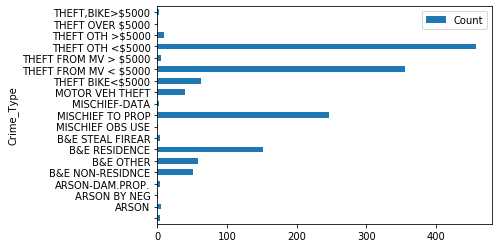

In [31]:
crimetype_data.plot(x='Crime_Type', y='Count', kind='barh')

<h2>Let's examine theft from vehicles</h2>

In [32]:
mvcrime_df = crime_df.loc[crime_df['Crime_Type'] == 'THEFT FROM MV < $5000']
mvcrime_df

,Neighbourhood,Crime_Code,Crime_Type,Ward,City,FID
18,Fredericton South,2142,THEFT FROM MV < $5000,7,Fredericton,19
19,Fredericton South,2142,THEFT FROM MV < $5000,7,Fredericton,20
20,Fredericton South,2142,THEFT FROM MV < $5000,7,Fredericton,21
21,Fredericton South,2142,THEFT FROM MV < $5000,12,Fredericton,22
22,Fredericton South,2142,THEFT FROM MV < $5000,12,Fredericton,23
23,Fredericton South,2142,THEFT FROM MV < $5000,7,Fredericton,24
24,Fredericton South,2142,THEFT FROM MV < $5000,7,Fredericton,25
25,Fredericton South,2142,THEFT FROM MV < $5000,7,Fredericton,26
26,Fredericton South,2142,THEFT FROM MV < $5000,11,Fredericton,27
27,Fredericton South,2142,THEFT FROM MV < $5000,11,Fredericton,28


In [33]:
mvcrime_data = mvcrime_df.groupby(['Neighbourhood']).size().to_frame(name='Count').reset_index()
mvcrime_data

,Neighbourhood,Count
0,Barkers Point,8
1,Brookside Estates,3
2,College Hill,10
3,Colonial heights,6
4,Diamond Street,1
5,Douglas,1
6,Downtown,21
7,Dun's Crossing,9
8,Forest Hill,8
9,Fredericton South,20


In [34]:
mvcrime_data.describe()

,Count
count,51.000000
mean,6.980392
std,7.457855
min,1.000000
25%,2.000000
50%,4.000000
75%,10.000000
max,40.000000


In [35]:
mvcrime_data.rename({'Platt': 'Plat'},inplace=True)
mvcrime_data.rename(index=str, columns={'Neighbourhood':'Neighbourh','Count':'MVCrime_Count'}, inplace=True)
mvcrime_data

,Neighbourh,MVCrime_Count
0,Barkers Point,8
1,Brookside Estates,3
2,College Hill,10
3,Colonial heights,6
4,Diamond Street,1
5,Douglas,1
6,Downtown,21
7,Dun's Crossing,9
8,Forest Hill,8
9,Fredericton South,20


In [36]:
world_geo = r'world_countries.json' # geojson file

fredericton_c_map = folium.Map(location=[45.91, -66.65], width=1000, height=750,zoom_start=12)

fredericton_c_map

In [37]:
fredericton_geo = r.json()
threshold_scale = np.linspace(mvcrime_data['MVCrime_Count'].min(), mvcrime_data['MVCrime_Count'].max(),6,dtype=int)
threshold_scale = threshold_scale.tolist()
threshold_scale[-1] = threshold_scale[-1]+1

fredericton_c_map.choropleth(geo_data=fredericton_geo,data=mvcrime_data,columns=['Neighbourh', 'MVCrime_Count'],key_on='feature.properties.Neighbourh',
    threshold_scale=threshold_scale, fill_color='YlOrRd',fill_opacity=0.7,line_opacity=0.1,legend_name='Fredericton Neighbourhoods')
fredericton_c_map

<h2>Is it possible the higher rate of crime in the downtown area is due to population density?</h2>

In [38]:
opendemog = 'Fredericton_Census_Tract_Demographics.xlsx'

workbook = pd.ExcelFile(opendemog)
print(workbook.sheet_names)

['Worksheet']


In [39]:
demog_df = workbook.parse('Worksheet')
demog_df.head()

,FID,OBJECTID,DBUID,DAUID,CDUID,CTUID,CTNAME,DBuid_1,DBpop2011,DBtdwell20,DBurdwell2,Shape_Leng,Shape_Area,CTIDLINK,Shape__Area,Shape__Length
0,1,501,1310024304,13100243,1310,3200002,2.0,1310024304,60,25,22,0.007462,0.000003,3200002,5.013915e+04,929.421025
1,2,502,1310032004,13100320,1310,3200010,10.0,1310032004,15,3,3,0.009008,0.000003,3200010,5.914999e+04,1211.100736
2,3,503,1310017103,13100171,1310,3200014,14.0,1310017103,0,0,0,0.010602,0.000007,3200014,1.206995e+05,1451.322317
3,4,504,1310018301,13100183,1310,3200012,12.0,1310018301,108,60,50,0.039599,0.000068,3200012,1.204640e+06,5615.379455
4,5,505,1310022905,13100229,1310,3200007,7.0,1310022905,129,47,44,0.011833,0.000005,3200007,9.439736e+04,1507.917222


In [41]:
world_geo = r'world_countries.json' # geojson file
fredericton_d_map = folium.Map(location=[45.94, -66.63], width=1200, height=750,zoom_start=12)
fredericton_d_map

threshold_scale = np.linspace(demog_df['DBpop2011'].min(),demog_df['DBpop2011'].max(),6,dtype=int)
threshold_scale = threshold_scale.tolist()
threshold_scale[-1] = threshold_scale[-1]+1

fredericton_d_map.choropleth(geo_data=demog_geo,data=demog_df,columns=['OBJECTID','DBpop2011'],key_on='feature.properties.OBJECTID',
    threshold_scale=threshold_scale,fill_color='PuBuGn',fill_opacity=0.7, line_opacity=0.1,legend_name='Fredericton Population Density')
fredericton_d_map

<h2>Let's look at specific locations in Fredericton</h2>

In [42]:
pointbook = 'Fredericton Locations.xlsx'

workbook_2 = pd.ExcelFile(pointbook)
print(workbook_2.sheet_names)

['Sheet1']


In [43]:
location_df = workbook_2.parse('Sheet1')
location_df

,Unnamed: 0,Location,Latitude,Longitude
0,0,Knowledge Park,45.931143,-66.652700
1,1,Fredericton Downtown,45.963026,-66.383550
2,2,Fredericton Hill,45.948512,-66.656045
3,3,Nashwaaksis,45.983382,-66.644856
4,4,University of New Brunswick,45.948121,-66.641406
5,5,Devon,45.968802,-66.622738
6,6,New Maryland,45.892795,-66.683673
7,7,Marysville,45.978913,-66.589491
8,8,Skyline Acres,45.931827,-66.640339
9,9,Hanwell,45.902315,-66.755113


<h2>Add location markers to map</h2>

In [46]:
for lat, lng, point in zip(location_df['Latitude'], location_df['Longitude'], location_df['Location']):
    label = '{}'.format(point)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radium=1,popup=label,color='blue',fill=True,fill_color='#3186cc',fill_opacity=0.7,
        parse_html=False).add_to(fredericton_c_map)
fredericton_c_map

<h2>Explore Fredericton Neighbourhoods</h2>

In [47]:
CLIENT_ID = 'Nope' # your Foursquare ID
CLIENT_SECRET = 'Secret' # your Foursquare Secret
VERSION = '20181201' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Nope
CLIENT_SECRET:Secret


<h2>Let's take a look at nearby venues</h2>

In [48]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,            
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Location', 
                  'Location Latitude', 
                  'Location Longitude', 
                  'Venue',
                  'Venue id',                
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'        
                   ]
    
    return(nearby_venues)